<a href="https://colab.research.google.com/github/VishalSharma2000/image-processing-assignment/blob/main/Image_Processing_Assignment_CSE18U029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Processing Assignment

# Question 1: Program to implement histogram equilization

In [65]:
# Import required libraries

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Since colab does not support imshow() function to show the image, it's suggested
# to use cv2_imshow function
from google.colab.patches import cv2_imshow

In [66]:
# Path of the image in the colab environment

IMAGE_PATH = '/content/images/flower-image.jpeg';

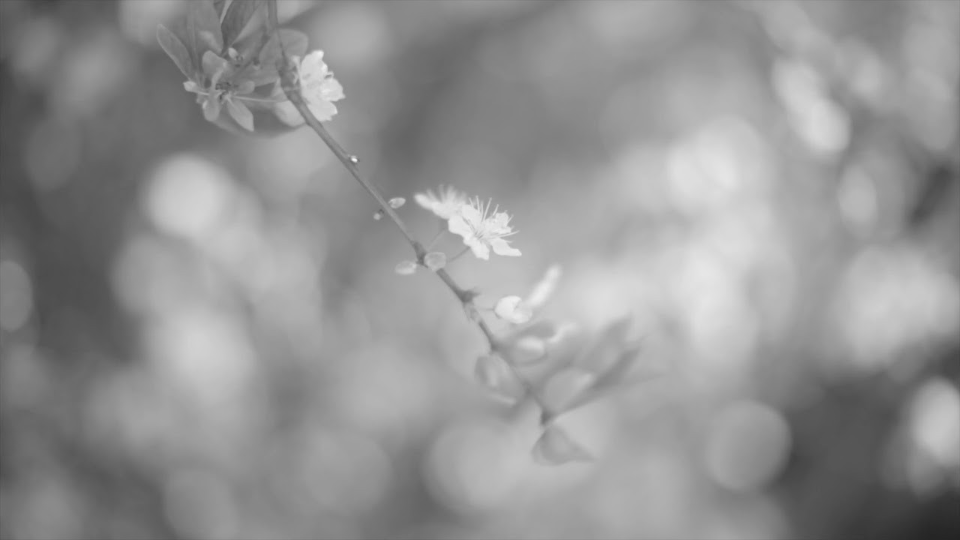

In [67]:
# read image and show the image

img = cv.imread(IMAGE_PATH, 0)
img = cv.resize(img, (960, 540))

cv2_imshow(img)

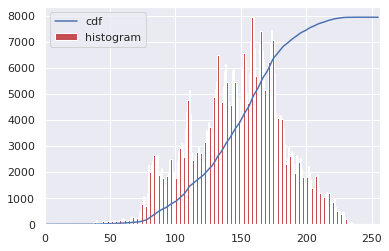

In [69]:
# finding pixel intensity of the image and plot in histogram format
hist, bins = np.histogram(img.flatten(), 256, [0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.show()

In [70]:
# equilize the contrast, basically the intensity of the pixel

equ = cv.equalizeHist(img)

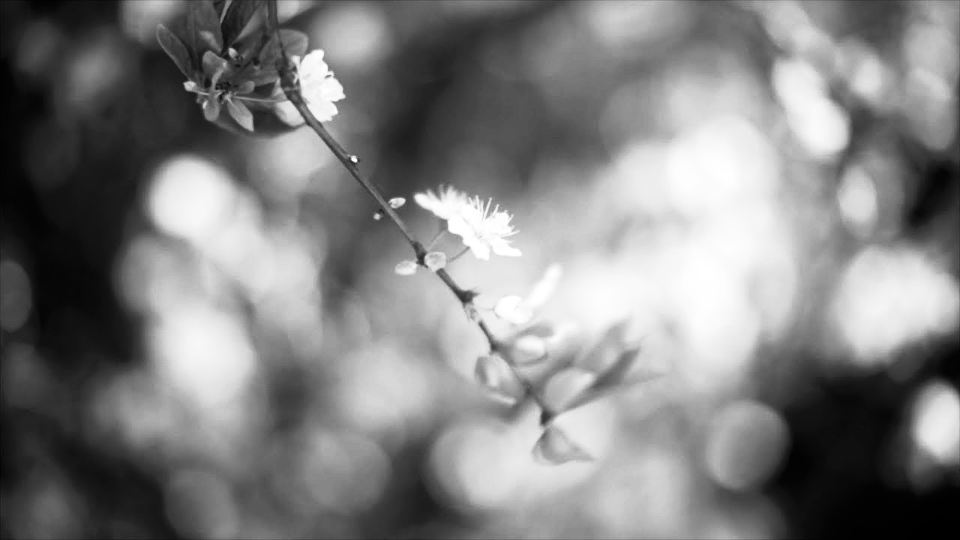

In [71]:
equ = cv.resize(equ, (960, 540))

cv2_imshow(equ)
cv.waitKey(0)
cv.destroyAllWindows()

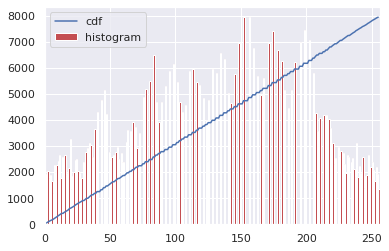

In [72]:
# again find the pixel intensity and plot the histogram
hist,bins = np.histogram(equ.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.show()

# Question 2: Discrete Fourier Transformation for given image

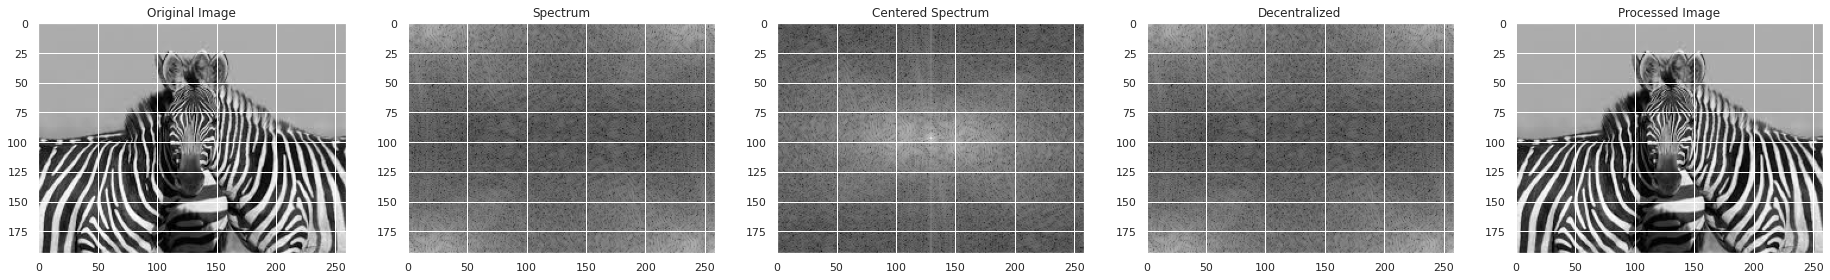

In [78]:
# import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_PATH = '/content/images/zebra-image.jpeg';

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_c1 = cv2.imread(IMAGE_PATH, 0)
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

# plot images in different way
plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

(<matplotlib.image.AxesImage at 0x7f8a312e5050>,
 Text(0.5, 1.0, 'Original Image'))

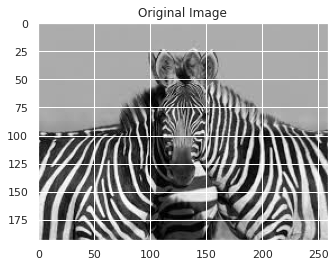

In [79]:
img_c1 = cv2.imread(IMAGE_PATH, 0)
plt.imshow(img_c1, "gray"), plt.title("Original Image")

(<matplotlib.image.AxesImage at 0x7f8a316bb3d0>, Text(0.5, 1.0, 'Spectrum'))

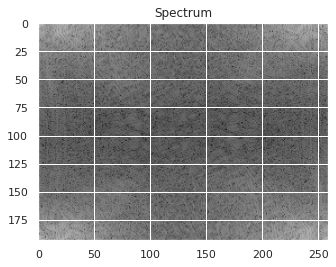

In [80]:
img_c2 = np.fft.fft2(img_c1)
plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")

(<matplotlib.image.AxesImage at 0x7f8a30a5d290>,
 Text(0.5, 1.0, 'Centered Spectrum'))

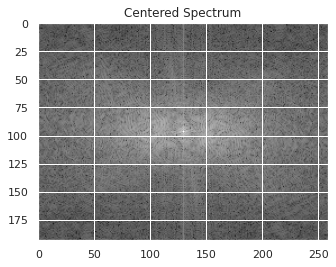

In [81]:
img_c3 = np.fft.fftshift(img_c2)
plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")

(<matplotlib.image.AxesImage at 0x7f8a311ea510>,
 Text(0.5, 1.0, 'Decentralized'))

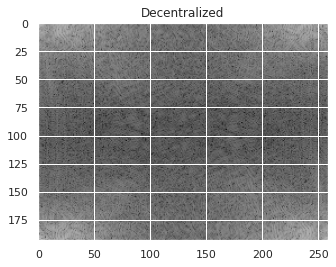

In [82]:
img_c4 = np.fft.ifftshift(img_c3)
plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")

(<matplotlib.image.AxesImage at 0x7f8a30a70390>,
 Text(0.5, 1.0, 'Processed Image'))

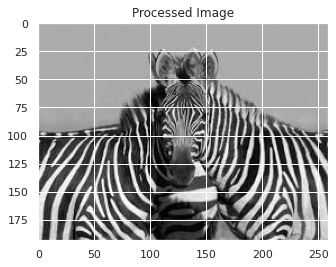

In [83]:
img_c5 = np.fft.ifft2(img_c4)
plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

In [84]:
## Gaussian Filters

def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

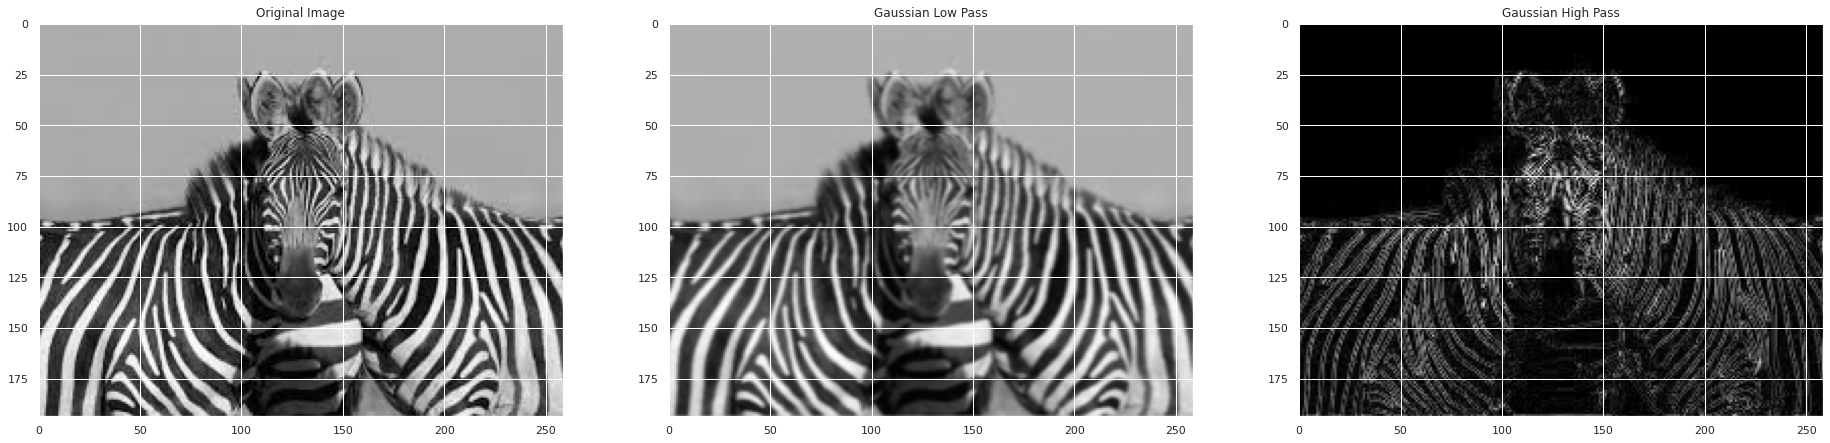

In [85]:
img = cv2.imread(IMAGE_PATH, 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

# Question 3: Program to segment the image using K-means clustering

In [86]:
# import required libraries

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [87]:
IMAGE_PATH = '/content/images/island-image.jpeg'

original_image = cv2.imread(IMAGE_PATH)

In [88]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

In [89]:
vectorized = img.reshape((-1,3))

In [90]:
vectorized = np.float32(vectorized)

In [91]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [92]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 

In [93]:
center = np.uint8(center)

In [94]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

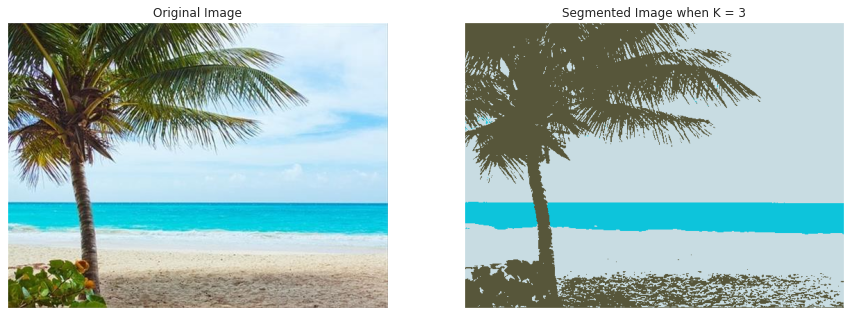

In [95]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

# Question 4: Program to implement K-Nearest Neighbour classifier

In [52]:
#

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [45]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [47]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [48]:
y_pred = knn.predict(X_test)

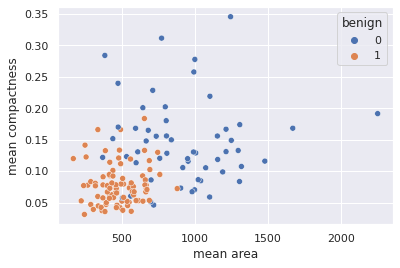

In [49]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

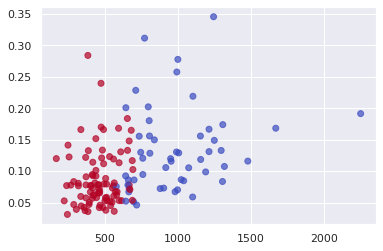

In [50]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [53]:
confusion_matrix(y_test, y_pred)

metrics.accuracy_score(y_test, y_pred)

0.8461538461538461